In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import roc_curve
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [16]:
data=pd.read_csv('hra.csv')
data=pd.DataFrame(data=data)
data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,...,1,80,3,12,3,2,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,...,2,80,1,1,2,3,1,0,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,...,2,80,0,10,2,3,9,7,1,8
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,...,2,80,2,17,3,2,7,7,7,7


In [17]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [18]:
data.tail()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,...,1,80,0,6,3,4,4,3,1,2


In [19]:
data.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [20]:
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [21]:
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [22]:
data.shape

(1470, 35)

In [23]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in data.columns:
    data[col] = le.fit_transform(data[col])
 
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,23,1,2,624,2,0,1,1,0,0,...,0,0,0,8,0,0,6,4,0,5
1,31,0,1,113,1,7,0,1,0,1,...,3,0,1,10,3,2,10,7,1,7
2,19,1,2,805,1,1,1,4,0,2,...,1,0,0,7,3,2,0,0,0,0
3,15,0,1,820,1,2,3,1,0,3,...,2,0,0,8,3,2,8,7,3,0
4,9,0,2,312,1,1,0,3,0,4,...,3,0,1,6,3,2,2,2,2,2


In [24]:
data.describe()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,18.923810,0.161224,1.607483,443.074830,1.260544,8.192517,1.912925,2.247619,0.0,734.500000,...,1.712245,0.0,0.793878,11.278231,2.799320,1.761224,6.991156,4.229252,2.187755,4.123129
std,9.135373,0.367863,0.665455,253.513199,0.527792,8.106864,1.024165,1.331369,0.0,424.496761,...,1.081209,0.0,0.852077,7.775842,1.289271,0.706476,6.053027,3.623137,3.222430,3.568136
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12.000000,0.000000,1.000000,225.000000,1.000000,1.000000,1.000000,1.000000,0.0,367.250000,...,1.000000,0.0,0.000000,6.000000,2.000000,1.000000,3.000000,2.000000,0.000000,2.000000
50%,18.000000,0.000000,2.000000,447.000000,1.000000,6.000000,2.000000,2.000000,0.0,734.500000,...,2.000000,0.0,1.000000,10.000000,3.000000,2.000000,5.000000,3.000000,1.000000,3.000000
75%,25.000000,0.000000,2.000000,660.000000,2.000000,13.000000,3.000000,3.000000,0.0,1101.750000,...,3.000000,0.0,1.000000,15.000000,3.000000,2.000000,9.000000,7.000000,3.000000,7.000000
max,42.000000,1.000000,2.000000,885.000000,2.000000,28.000000,4.000000,5.000000,0.0,1469.000000,...,3.000000,0.0,3.000000,39.000000,6.000000,3.000000,36.000000,18.000000,15.000000,17.000000


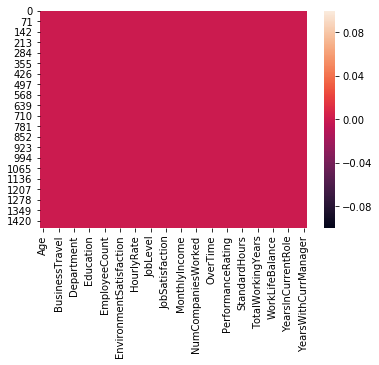

In [25]:
sns.heatmap(data.isnull())

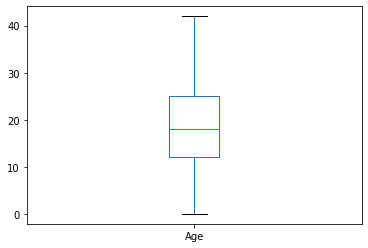

In [26]:
data['Age'].plot.box()

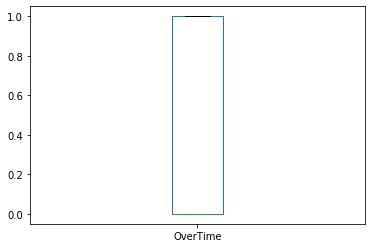

In [27]:
data['OverTime'].plot.box()

In [28]:
x = data.iloc[:,2:35]
y = data.iloc[:, 1]

In [29]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x=scaler.fit_transform(x)
x

array([[ 0.59004834,  0.71391447,  1.40151234, ..., -0.0632959 ,
        -0.67914568,  0.24583399],
       [-0.91319439, -1.30244563, -0.49381714, ...,  0.76499762,
        -0.36871529,  0.80654148],
       [ 0.59004834,  1.42812421, -0.49381714, ..., -1.16768726,
        -0.67914568, -1.15593471],
       ...,
       [ 0.59004834, -1.59444298, -0.49381714, ..., -0.61549158,
        -0.67914568, -0.31487349],
       [-0.91319439,  0.53634851,  1.40151234, ...,  0.48889978,
        -0.67914568,  1.08689522],
       [ 0.59004834, -0.42250766, -0.49381714, ..., -0.33939374,
        -0.36871529, -0.59522723]])

In [30]:
x.shape

(1470, 33)

In [31]:
y.shape

(1470,)

In [32]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=.25,random_state=0)

In [33]:
train_x.shape

(1102, 33)

In [34]:
test_x.shape

(368, 33)

In [35]:
train_y.shape

(1102,)

In [36]:
test_y.shape

(368,)

In [37]:
lg=LogisticRegression()

In [38]:
lg.fit(train_x,train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [39]:
pred=lg.predict(test_x)
print(pred)

[0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 1 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [40]:
print("accuracy score:",accuracy_score(pred,test_y))

accuracy score: 0.8831521739130435


In [41]:
print(confusion_matrix(test_y,pred))

[[302   8]
 [ 35  23]]


In [42]:
print(classification_report(test_y,pred))

              precision    recall  f1-score   support

           0       0.90      0.97      0.93       310
           1       0.74      0.40      0.52        58

    accuracy                           0.88       368
   macro avg       0.82      0.69      0.73       368
weighted avg       0.87      0.88      0.87       368



In [43]:
gnb=GaussianNB()
gnb.fit(train_x,train_y)
predgnb=gnb.predict(test_x)
print(accuracy_score(test_y,predgnb))
print(confusion_matrix(test_y,predgnb))
print(classification_report(test_y,predgnb))

0.8179347826086957
[[266  44]
 [ 23  35]]
              precision    recall  f1-score   support

           0       0.92      0.86      0.89       310
           1       0.44      0.60      0.51        58

    accuracy                           0.82       368
   macro avg       0.68      0.73      0.70       368
weighted avg       0.85      0.82      0.83       368



In [44]:
svc=SVC(kernel='rbf')
svc.fit(train_x,train_y)
svc.score(train_x,train_y)
predsvc=svc.predict(test_x)
print(accuracy_score(test_y,predgnb))
print(confusion_matrix(test_y,predgnb))
print(classification_report(test_y,predgnb))

0.8179347826086957
[[266  44]
 [ 23  35]]
              precision    recall  f1-score   support

           0       0.92      0.86      0.89       310
           1       0.44      0.60      0.51        58

    accuracy                           0.82       368
   macro avg       0.68      0.73      0.70       368
weighted avg       0.85      0.82      0.83       368



In [45]:
dtc=DecisionTreeClassifier()
dtc.fit(train_x,train_y)
dtc.score(train_x,train_y)
preddtc=dtc.predict(test_x)
print(accuracy_score(test_y,preddtc))
print(confusion_matrix(test_y,preddtc))
print(classification_report(test_y,preddtc))

0.8016304347826086
[[279  31]
 [ 42  16]]
              precision    recall  f1-score   support

           0       0.87      0.90      0.88       310
           1       0.34      0.28      0.30        58

    accuracy                           0.80       368
   macro avg       0.60      0.59      0.59       368
weighted avg       0.79      0.80      0.79       368



In [46]:
dtc=KNeighborsClassifier()
dtc.fit(train_x,train_y)
dtc.score(train_x,train_y)
preddtc=dtc.predict(test_x)
print(accuracy_score(test_y,preddtc))
print(confusion_matrix(test_y,preddtc))
print(classification_report(test_y,preddtc))

0.8505434782608695
[[306   4]
 [ 51   7]]
              precision    recall  f1-score   support

           0       0.86      0.99      0.92       310
           1       0.64      0.12      0.20        58

    accuracy                           0.85       368
   macro avg       0.75      0.55      0.56       368
weighted avg       0.82      0.85      0.80       368



In [47]:
y_pred_prob=lg.predict_proba(test_x)[:,1]
y_pred_prob

array([1.55035338e-01, 2.00776342e-01, 4.04199926e-01, 8.91359468e-02,
       7.12984258e-01, 7.55599238e-02, 6.93863769e-01, 5.97422985e-02,
       5.85013189e-03, 4.62819096e-01, 8.10715317e-02, 3.34887688e-01,
       6.47791397e-03, 6.90054345e-01, 1.03459979e-01, 2.12959932e-02,
       6.20607042e-02, 1.14116826e-01, 3.50365522e-02, 4.33135651e-01,
       1.62312003e-01, 1.64732087e-02, 3.00087690e-02, 2.90570938e-02,
       6.90561271e-01, 4.41311215e-01, 9.53226854e-02, 4.44730163e-02,
       6.88079971e-01, 3.35416977e-02, 5.53328335e-03, 2.84073305e-02,
       2.98899539e-02, 1.18710670e-01, 4.61794047e-02, 1.82249258e-02,
       1.60042577e-01, 4.47037171e-02, 3.25731009e-02, 3.66184687e-02,
       4.04172526e-02, 1.55744222e-02, 7.04989278e-03, 5.82475766e-03,
       1.29531044e-02, 5.58448271e-01, 3.53551507e-01, 5.60438525e-04,
       7.91657776e-01, 5.89603330e-01, 9.08065601e-02, 6.12896852e-01,
       5.63840821e-02, 3.11202309e-01, 6.60531619e-01, 2.03075408e-01,
      

In [48]:
fpr,tpr,thresholds=roc_curve(test_y,y_pred_prob)

In [49]:
fpr

array([0.        , 0.        , 0.        , 0.00322581, 0.00322581,
       0.00645161, 0.00645161, 0.00967742, 0.00967742, 0.01290323,
       0.01290323, 0.01612903, 0.01612903, 0.01935484, 0.01935484,
       0.02258065, 0.02258065, 0.02580645, 0.02580645, 0.03548387,
       0.03548387, 0.05806452, 0.05806452, 0.07096774, 0.07096774,
       0.08709677, 0.08709677, 0.09677419, 0.09677419, 0.1       ,
       0.1       , 0.11290323, 0.11290323, 0.11935484, 0.11935484,
       0.14193548, 0.14193548, 0.14516129, 0.14516129, 0.1516129 ,
       0.1516129 , 0.18064516, 0.18064516, 0.21935484, 0.21935484,
       0.22258065, 0.22258065, 0.22903226, 0.22903226, 0.30322581,
       0.30322581, 0.31935484, 0.31935484, 0.34516129, 0.34516129,
       0.35483871, 0.35483871, 0.37419355, 0.37419355, 0.41290323,
       0.41290323, 0.42580645, 0.42580645, 0.46774194, 0.46774194,
       0.67419355, 0.67419355, 0.68064516, 0.68064516, 0.72903226,
       0.72903226, 0.88064516, 0.88064516, 1.        ])

In [50]:
tpr

array([0.        , 0.01724138, 0.12068966, 0.12068966, 0.18965517,
       0.18965517, 0.22413793, 0.22413793, 0.29310345, 0.29310345,
       0.31034483, 0.31034483, 0.32758621, 0.32758621, 0.36206897,
       0.36206897, 0.37931034, 0.37931034, 0.44827586, 0.44827586,
       0.46551724, 0.46551724, 0.48275862, 0.48275862, 0.5       ,
       0.5       , 0.53448276, 0.53448276, 0.56896552, 0.56896552,
       0.5862069 , 0.5862069 , 0.60344828, 0.60344828, 0.62068966,
       0.62068966, 0.65517241, 0.65517241, 0.67241379, 0.67241379,
       0.68965517, 0.68965517, 0.74137931, 0.74137931, 0.75862069,
       0.75862069, 0.77586207, 0.77586207, 0.79310345, 0.79310345,
       0.81034483, 0.81034483, 0.82758621, 0.82758621, 0.84482759,
       0.84482759, 0.86206897, 0.86206897, 0.87931034, 0.87931034,
       0.89655172, 0.89655172, 0.9137931 , 0.9137931 , 0.93103448,
       0.93103448, 0.94827586, 0.94827586, 0.96551724, 0.96551724,
       0.98275862, 0.98275862, 1.        , 1.        ])

In [51]:
thresholds

array([1.90518601e+00, 9.05186010e-01, 7.38877774e-01, 7.21113148e-01,
       6.93863769e-01, 6.90561271e-01, 6.88858100e-01, 6.88079971e-01,
       6.33519004e-01, 6.14560696e-01, 6.12896852e-01, 5.94221134e-01,
       5.89603330e-01, 5.86559488e-01, 5.39325020e-01, 5.37599217e-01,
       5.26951655e-01, 5.23503889e-01, 4.62819096e-01, 4.41311215e-01,
       4.40878689e-01, 4.08235577e-01, 4.04199926e-01, 3.94562869e-01,
       3.76454518e-01, 3.46260438e-01, 3.42510491e-01, 3.35474392e-01,
       3.25029217e-01, 3.24573326e-01, 3.20935103e-01, 3.11202309e-01,
       3.06828267e-01, 2.93321107e-01, 2.91798512e-01, 2.54671691e-01,
       2.46778877e-01, 2.46663507e-01, 2.43689246e-01, 2.38767687e-01,
       2.36270103e-01, 2.16179450e-01, 2.07700537e-01, 1.82697680e-01,
       1.82185031e-01, 1.81522247e-01, 1.80333769e-01, 1.77513544e-01,
       1.76656760e-01, 1.31872325e-01, 1.31177251e-01, 1.29833603e-01,
       1.29615511e-01, 1.19990451e-01, 1.18710670e-01, 1.18261516e-01,
      

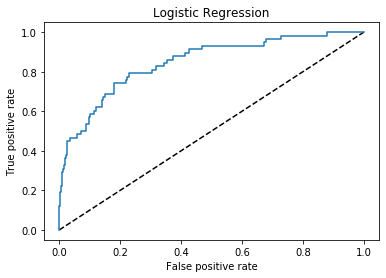

In [52]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Logistic Regression')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Logistic Regression')
plt.show()

In [53]:
from sklearn.metrics import roc_auc_score


In [54]:
auc_score=roc_auc_score(test_y,lg.predict(test_x))


In [55]:
print(auc_score)

0.685372636262514


In [56]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor()
rfr.fit(train_x,train_y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [57]:
rfr.score(train_x,train_y)

0.8324492031691654

In [58]:
rfr=RandomForestRegressor(n_estimators=100,random_state=46)
rfr.fit(train_x,train_y)
rfr.score(train_x,train_y)

0.8861261552987889

In [59]:
rfr=RandomForestRegressor(n_estimators=400,random_state=56)
rfr.fit(train_x,train_y)
rfr.score(train_x,train_y)

0.889200532330208

In [60]:
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor()
gbr.fit(train_x,train_y)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [61]:
gbr=GradientBoostingRegressor(n_estimators=100,random_state=46)
gbr.fit(train_x,train_y)
gbr.score(train_x,train_y)

0.6406026040916697

In [62]:
gbr=GradientBoostingRegressor(n_estimators=500,random_state=76)
gbr.fit(train_x,train_y)
gbr.score(train_x,train_y)

0.9228357018307977